In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from tqdm import tqdm
import utils

In [2]:
import imp

In [3]:
imp.reload(utils)

<module 'utils' from '/home/aaleshin/Documents/stady/utils.py'>

In [4]:
pages = ['Items', 'Ratings', 'CBF', 'Item-Item', 'MF', 'PersBias', 'User-User']

In [5]:
data_raw = pd.read_excel('office-products.xlsx', sheet_name=pages)

In [6]:
data_raw['Items'].head()

,Item,Availability,ASIN,Price,Brand,Title,LeafCat,FullCat
0,24,0.475237,B00004Z498,3.62,Scotch,"3M Scotch Mounting Tape, .5-Inch by 75-Inch (110)",Mounting Tape,"Office Products/Office & School Supplies/Tape,..."
1,30,0.543847,B00004Z5QO,8.16,Avery,Avery Easy Peel Return Address Labels for Inkj...,Printer Labels: Laser & Inkjet,Office Products/Office & School Supplies/Label...
2,35,0.336081,B00004Z5SN,8.22,Avery,Avery Easy Peel Address Labels for Laser Print...,Address Labels,Office Products/Office & School Supplies/Label...
3,41,0.564493,B00004Z69W,15.96,Avery,Avery Easy Peel Address Labels for Inkjet Prin...,Address Labels,Office Products/Office & School Supplies/Label...
4,45,0.908922,B0000538AC,4.39,Scotch,"Scotch(R) Gift Wrap Tape, 0.75 x 300 Inches, 3...",Transparent Tape,"Office Products/Office & School Supplies/Tape,..."


In [7]:
data_raw['Ratings'].head()

,item,64,65,75,79,83,112,252,271,301,...,3411,3430,3524,3533,3625,3902,3991,4047,4342,4462
0,24,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45,NaN,5.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_raw['User-User'].head()

,Item,64,65,75,79,83,112,252,271,301,...,3411,3430,3524,3533,3625,3902,3991,4047,4342,4462
0,24,4.590799,4.877711,4.458179,4.805026,4.997193,4.098849,4.043067,5.239944,4.191001,...,4.010254,4.084892,4.512691,3.754210,4.310961,4.588265,5.260862,4.932911,3.333438,4.918313
1,30,4.426518,4.859874,4.646025,4.937423,4.633184,4.356083,4.073458,4.786792,4.767103,...,3.995149,4.087980,4.534441,3.964599,4.134575,4.655635,5.022880,4.894737,3.967310,4.761658
2,35,4.025716,4.866861,4.835609,4.993884,4.664077,4.136289,3.867810,4.656409,4.436962,...,3.673124,3.910839,4.504693,3.927909,4.142269,4.573515,4.514161,4.683942,3.785175,4.177748
3,41,4.638216,5.001494,4.586768,4.785592,4.859969,4.371172,4.004206,4.482062,4.821622,...,3.920856,4.121550,4.257406,3.848176,4.640973,4.564264,5.557184,4.846247,3.628684,5.171294
4,45,4.806725,5.367683,4.748397,5.171098,4.974515,4.384480,4.413938,4.744272,5.028890,...,4.189349,4.540017,4.674176,4.048724,4.525230,4.680311,4.492206,5.239830,3.613434,4.730830


### Set names of columns to one format

In [9]:
for pg in data_raw:
    columns = np.array(data_raw[pg].columns)
    columns[0] = 'Item'
    data_raw[pg].columns = columns
    data_raw[pg] = data_raw[pg].set_index('Item')

In [10]:
data_raw['Items'].head()

,Availability,ASIN,Price,Brand,Title,LeafCat,FullCat
Item,,,,,,,
24,0.475237,B00004Z498,3.62,Scotch,"3M Scotch Mounting Tape, .5-Inch by 75-Inch (110)",Mounting Tape,"Office Products/Office & School Supplies/Tape,..."
30,0.543847,B00004Z5QO,8.16,Avery,Avery Easy Peel Return Address Labels for Inkj...,Printer Labels: Laser & Inkjet,Office Products/Office & School Supplies/Label...
35,0.336081,B00004Z5SN,8.22,Avery,Avery Easy Peel Address Labels for Laser Print...,Address Labels,Office Products/Office & School Supplies/Label...
41,0.564493,B00004Z69W,15.96,Avery,Avery Easy Peel Address Labels for Inkjet Prin...,Address Labels,Office Products/Office & School Supplies/Label...
45,0.908922,B0000538AC,4.39,Scotch,"Scotch(R) Gift Wrap Tape, 0.75 x 300 Inches, 3...",Transparent Tape,"Office Products/Office & School Supplies/Tape,..."


In [11]:
mask = (data_raw['Ratings']>0).astype('int')

### RMSE & MAE

In [12]:
RMSE = pd.DataFrame()
MAE = pd.DataFrame()
for pg in pages[2:]:
    print(pg)
    RMSE[pg] = utils.RMSE(data_raw[pg], data_raw['Ratings'])
    MAE[pg] = utils.MAE(data_raw[pg], data_raw['Ratings'])


CBF
Item-Item
MF
PersBias
User-User


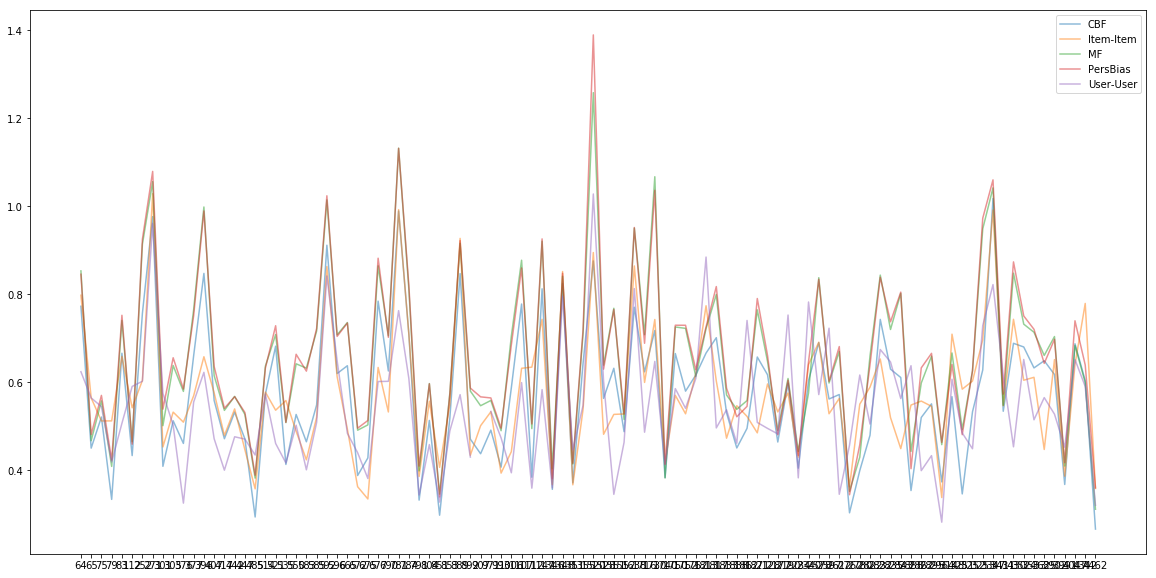

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(RMSE, alpha = 0.5)
plt.legend(RMSE.columns)
plt.show()

([<matplotlib.axis.XTick at 0x7f3a9a0fcc50>,
 <a list of 5 Text xticklabel objects>)

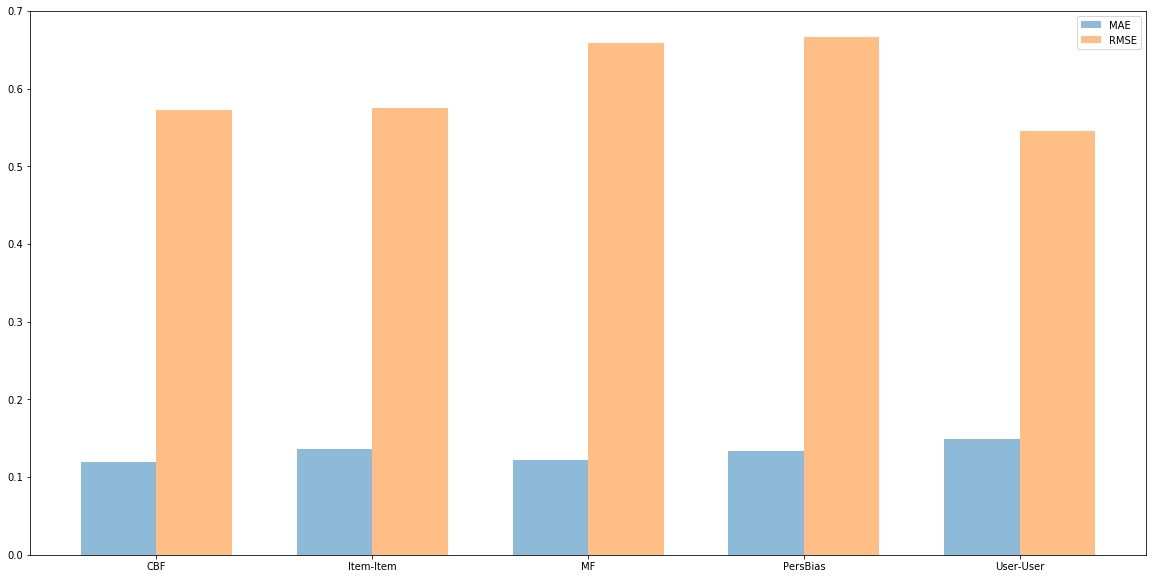

In [14]:
index = np.arange(len(MAE.abs().mean().index))
bar_width = 0.35
plt.figure(figsize=(20, 10))
plt.bar(index, MAE.abs().mean(), bar_width, align='center', alpha = 0.5, label = 'MAE')
plt.bar(index+bar_width, RMSE.mean(), bar_width, alpha = 0.5, label = 'RMSE')
plt.legend(['MAE', 'RMSE'])
plt.xticks(index + 0.5*bar_width, MAE.abs().mean().index)

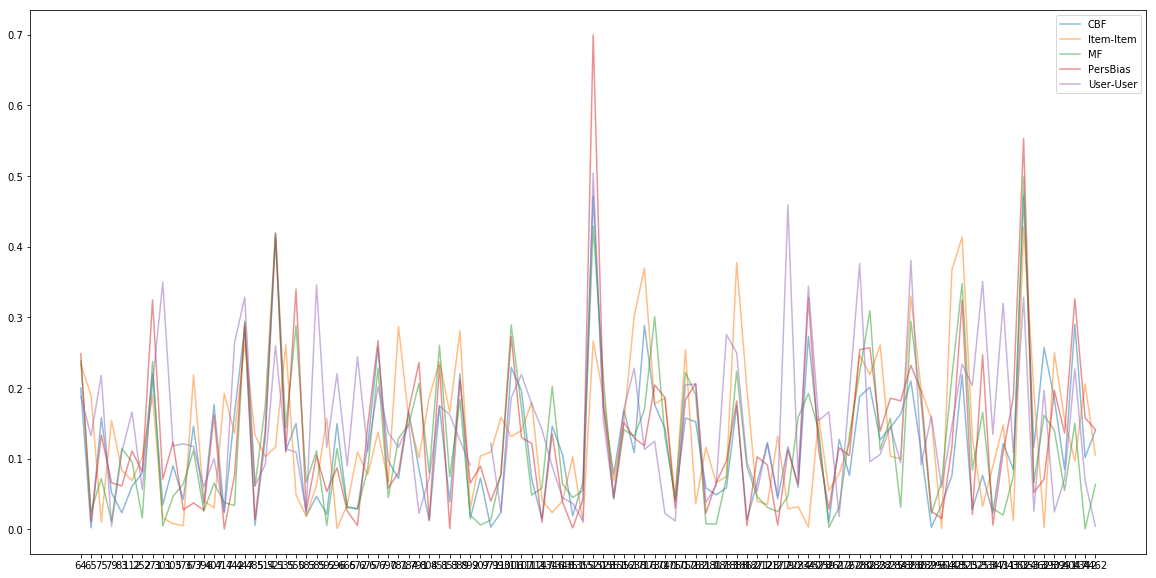

In [15]:
plt.figure(figsize=(20, 10))
plt.plot(MAE.abs(), alpha = 0.5)
plt.legend(MAE.columns)
plt.show()

In [16]:
strange_items = MAE.sort_values('MF', ascending=False)[:4].index

In [17]:
MAE_mean = MAE.abs().mean().rename('MAE_mean')
MAE_std = MAE.abs().std().rename('MAE_std')
RMSE_mean = MAE.abs().mean().rename('RMSE_mean')
RMSE_std = MAE.abs().std().rename('RMSE_std')

In [18]:
final_table = pd.DataFrame([MAE_mean, MAE_std, RMSE_mean, RMSE_std]).T

In [19]:
final_table

,MAE_mean,MAE_std,RMSE_mean,RMSE_std
CBF,0.119093,0.095137,0.119093,0.095137
Item-Item,0.135706,0.100839,0.135706,0.100839
MF,0.121366,0.103932,0.121366,0.103932
PersBias,0.133248,0.117852,0.133248,0.117852
User-User,0.149009,0.105061,0.149009,0.105061


### MAP@5

In [20]:
users = list(mask.sum().sort_values(ascending = True).index)

In [21]:
k=5

In [22]:
MAP_5 = {}
for pg in pages[2:]:
    print(pg)
    data = data_raw[pg]
    MAP_5[pg] = utils.map_5(data, users, mask)

CBF
Item-Item
MF
PersBias
User-User


In [23]:
pd.DataFrame(MAP_5).mean(axis=0).sort_values(ascending=False)

User-User    0.750167
Item-Item    0.399500
CBF          0.202042
MF           0.115750
PersBias     0.102000
dtype: float64

In [24]:
MAP_5_average = pd.DataFrame(MAP_5).mean(axis=0).sort_values(ascending=False)

In [25]:
final_table = final_table.join(MAP_5_average.rename('MAP@5').to_frame())
final_table

,MAE_mean,MAE_std,RMSE_mean,RMSE_std,MAP@5
CBF,0.119093,0.095137,0.119093,0.095137,0.202042
Item-Item,0.135706,0.100839,0.135706,0.100839,0.399500
MF,0.121366,0.103932,0.121366,0.103932,0.115750
PersBias,0.133248,0.117852,0.133248,0.117852,0.102000
User-User,0.149009,0.105061,0.149009,0.105061,0.750167


<BarContainer object of 5 artists>

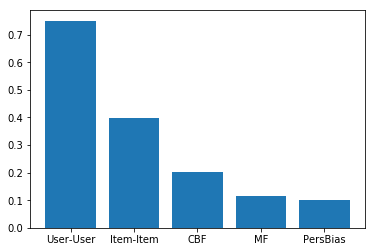

In [26]:
plt.bar(MAP_5_average.index, MAP_5_average.values)

### Precision and Recall (P@5, R@5)

In [27]:
P_5 = {}
R_5 = {}
count = 3
for pg in pages[2:]:
    print(pg)
    data = data_raw[pg]        
    P_5[pg], R_5[pg] = utils.precision_recall(data, data_raw['Ratings'],  users, mask)

CBF
Item-Item
MF
PersBias
User-User


In [28]:
P_5_avg = pd.DataFrame(P_5).mean().sort_values(ascending = False)
P_5_avg

User-User    0.520
Item-Item    0.214
CBF          0.104
MF           0.066
PersBias     0.056
dtype: float64

In [29]:
final_table = final_table.join(P_5_avg.rename('P@5'))

In [30]:
R_5_avg = pd.DataFrame(R_5).mean().sort_values(ascending = False)
R_5_avg

User-User    0.221559
Item-Item    0.082629
CBF          0.044007
MF           0.025081
PersBias     0.021659
dtype: float64

In [31]:
final_table = final_table.join(R_5_avg.rename('R@5'))

In [32]:
final_table

,MAE_mean,MAE_std,RMSE_mean,RMSE_std,MAP@5,P@5,R@5
CBF,0.119093,0.095137,0.119093,0.095137,0.202042,0.104,0.044007
Item-Item,0.135706,0.100839,0.135706,0.100839,0.399500,0.214,0.082629
MF,0.121366,0.103932,0.121366,0.103932,0.115750,0.066,0.025081
PersBias,0.133248,0.117852,0.133248,0.117852,0.102000,0.056,0.021659
User-User,0.149009,0.105061,0.149009,0.105061,0.750167,0.520,0.221559


([<matplotlib.axis.XTick at 0x7f3a97e77fd0>,
 <a list of 5 Text xticklabel objects>)

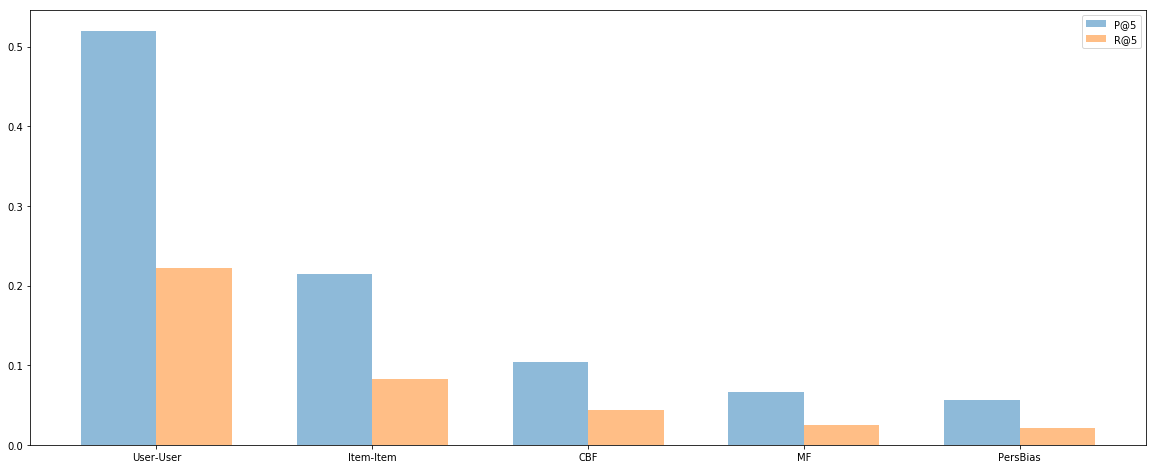

In [33]:
index = np.arange(len(P_5_avg.index))
bar_width = 0.35
plt.figure(figsize=(20, 8))
plt.bar(index, P_5_avg, bar_width, align='center', alpha = 0.5, label = 'P@5')
plt.bar(index+bar_width, R_5_avg, bar_width, alpha = 0.5, label = 'R@5')
plt.legend(['P@5', 'R@5'],)
plt.xticks(index + 0.5*bar_width, P_5_avg.index)

In [34]:
P_5_avg.rename('P@5').to_frame().join(R_5_avg.rename('R@5').to_frame())

,P@5,R@5
User-User,0.520,0.221559
Item-Item,0.214,0.082629
CBF,0.104,0.044007
MF,0.066,0.025081
PersBias,0.056,0.021659


### Deversity Among price

In [35]:
diversity = {}
for pg in pages[2:]:
    data = data_raw[pg]
    diversity[pg] = utils.diversity_among_price(data, data_raw['Items'], users)    

In [36]:
DV = pd.DataFrame(diversity).mean()

In [37]:
DV

CBF          0.365079
Item-Item    0.371214
MF           0.372737
PersBias     0.362438
User-User    0.370699
dtype: float64

In [38]:
final_table = final_table.join(DV.rename('diversity (price)'))

([<matplotlib.axis.XTick at 0x7f3a97fd1198>,
 <a list of 5 Text xticklabel objects>)

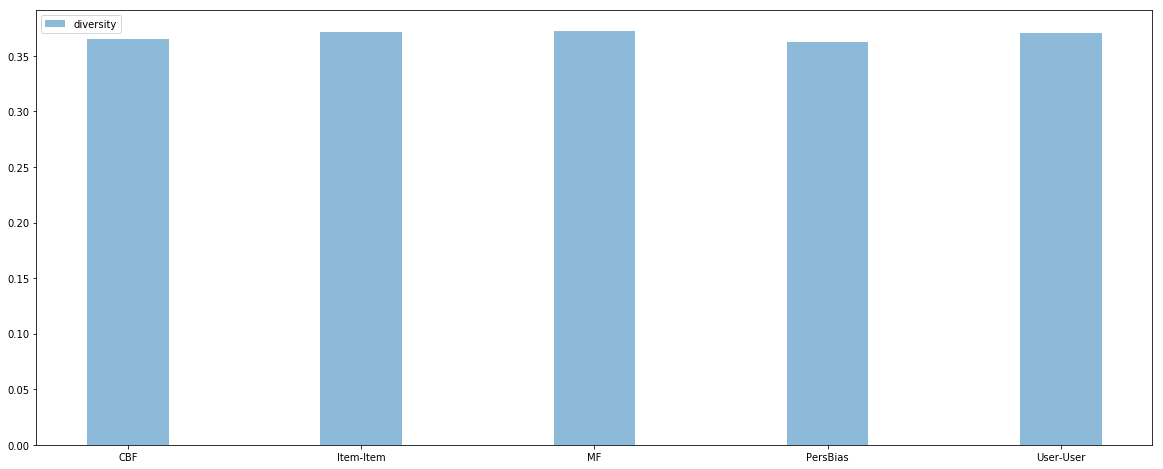

In [39]:
index = np.arange(len(DV.index))
bar_width = 0.35
plt.figure(figsize=(20, 8))
plt.bar(index, DV, bar_width, align='center', alpha = 0.5, label = 'diversity')
plt.legend(['diversity'],)
plt.xticks(index, DV.index)

In [40]:
DV.rename('diversity').to_frame()

,diversity
CBF,0.365079
Item-Item,0.371214
MF,0.372737
PersBias,0.362438
User-User,0.370699


### Personalization

In [41]:
personalization = {}
for pg in pages[2:]:
    data = data_raw[pg]
    personalization[pg] = utils.personalization(data, users)

In [42]:
pd.Series(personalization)

CBF          0.530869
Item-Item    0.895798
MF           0.199030
PersBias     0.000000
User-User    0.948485
dtype: float64

In [43]:
personalization = pd.Series(personalization).rename('personalization').to_frame()

In [44]:
personalization

,personalization
CBF,0.530869
Item-Item,0.895798
MF,0.199030
PersBias,0.000000
User-User,0.948485


In [45]:
final_table = final_table.join(personalization)

([<matplotlib.axis.XTick at 0x7f3a97f47278>,
 <a list of 5 Text xticklabel objects>)

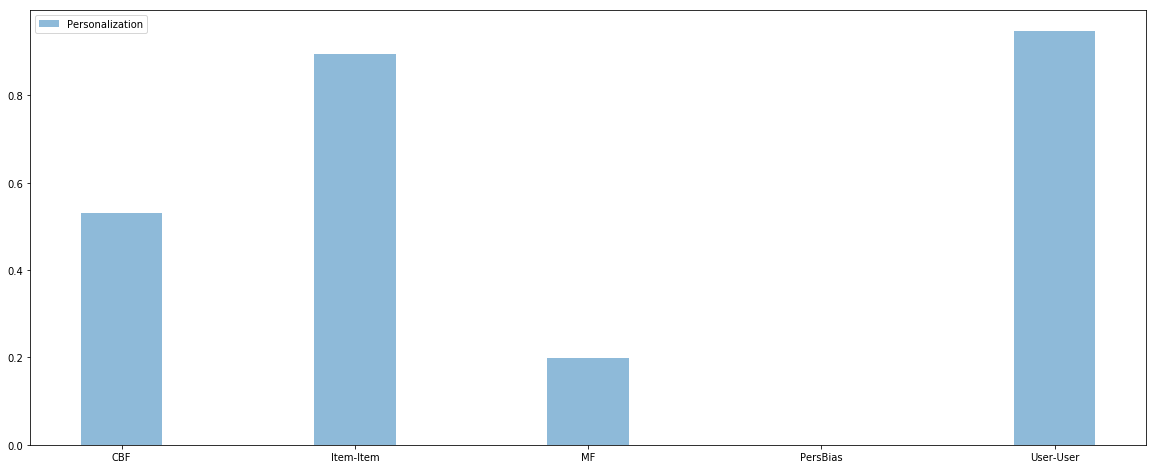

In [46]:
index = np.arange(len(personalization.index))
bar_width = 0.35
plt.figure(figsize=(20, 8))
plt.bar(index, personalization['personalization'], bar_width, align='center', alpha = 0.5, label = 'Personalization')
plt.legend(['Personalization'],)
plt.xticks(index, personalization.index)

### Catalog coverage

In [47]:
coverage_abs = {}
for pg in tqdm(pages[2:]):
    data = data_raw[pg]
    coverage_abs[pg] = utils.coverage(data, users)

100%|██████████| 5/5 [00:00<00:00, 13.33it/s]


In [48]:
coverage_abs = pd.Series(coverage_abs).rename('Coverage absolute')
coverage = (coverage_abs/data_raw['Items'].index.shape[0]).rename('coverage')

In [49]:
coverage.sort_values(ascending = False, inplace=True)

In [50]:
coverage

User-User    0.755
Item-Item    0.530
CBF          0.205
MF           0.045
PersBias     0.025
Name: coverage, dtype: float64

([<matplotlib.axis.XTick at 0x7f3a9a24add8>,
 <a list of 5 Text xticklabel objects>)

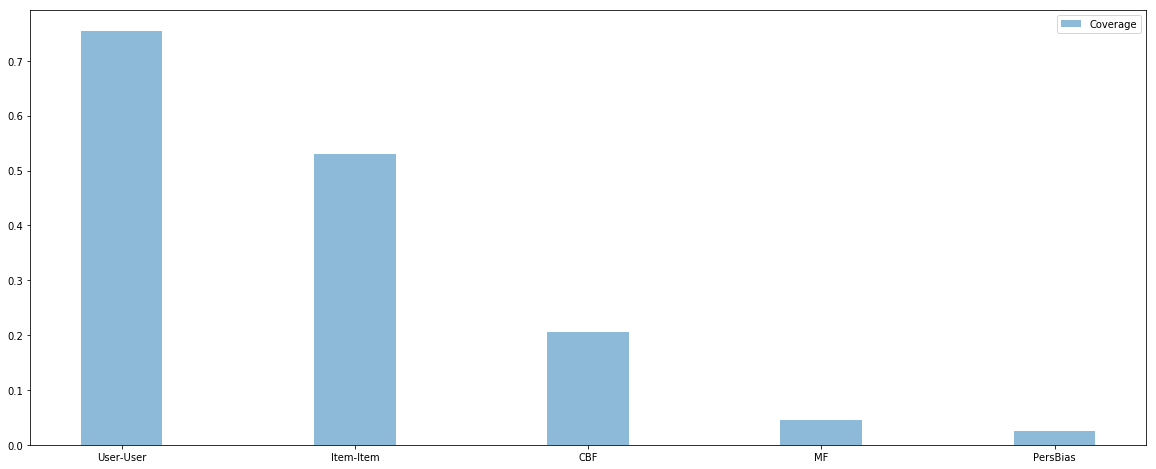

In [51]:
index = np.arange(len(coverage.index))
bar_width = 0.35
plt.figure(figsize=(20, 8))
plt.bar(index, coverage, bar_width, align='center', alpha = 0.5, label = 'Coverage')
plt.legend(['Coverage'],)
plt.xticks(index, coverage.index)

In [52]:
final_table = final_table.join(coverage_abs)
final_table = final_table.join(coverage)

### Diversity among categories

In [53]:
diversity_category = {}
for pg in tqdm(pages[2:]):
    data = data_raw[pg]
    div = {}
    diversity_category[pg] = utils.diversity_among_category(data, data_raw['Items'], users)

100%|██████████| 5/5 [00:16<00:00,  3.24s/it]


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


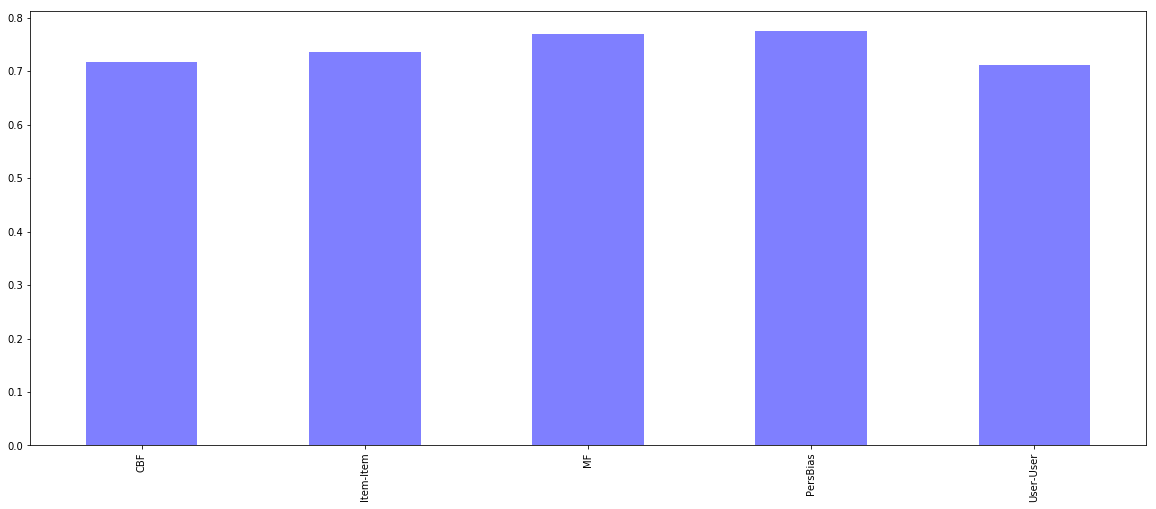

In [54]:
pd.Series(diversity_category).plot.bar(colors = {'b'}, alpha = 0.5, figsize = (20, 8))

In [55]:
pd.Series(diversity_category).rename('div categories').to_frame()

,div categories
CBF,0.71800
Item-Item,0.73525
MF,0.76950
PersBias,0.77500
User-User,0.71225


In [56]:
final_table = final_table.join(pd.Series(diversity_category).rename('diversity (categories)'))

In [57]:
final_table

,MAE_mean,MAE_std,RMSE_mean,RMSE_std,MAP@5,P@5,R@5,diversity (price),personalization,Coverage absolute,coverage,diversity (categories)
CBF,0.119093,0.095137,0.119093,0.095137,0.202042,0.104,0.044007,0.365079,0.530869,41,0.205,0.71800
Item-Item,0.135706,0.100839,0.135706,0.100839,0.399500,0.214,0.082629,0.371214,0.895798,106,0.530,0.73525
MF,0.121366,0.103932,0.121366,0.103932,0.115750,0.066,0.025081,0.372737,0.199030,9,0.045,0.76950
PersBias,0.133248,0.117852,0.133248,0.117852,0.102000,0.056,0.021659,0.362438,0.000000,5,0.025,0.77500
User-User,0.149009,0.105061,0.149009,0.105061,0.750167,0.520,0.221559,0.370699,0.948485,151,0.755,0.71225


### Serendipity

In [58]:
serendipity = {}
for pg in tqdm(pages[2:]):
    data = data_raw[pg]
    serendipity[pg] = utils.serendipity(data, users, mask)

100%|██████████| 5/5 [00:01<00:00,  3.64it/s]


In [59]:
pd.Series(serendipity).rename('serendipity').to_frame()

,serendipity
CBF,4.622260
Item-Item,4.875702
MF,4.558488
PersBias,4.607854
User-User,4.552626


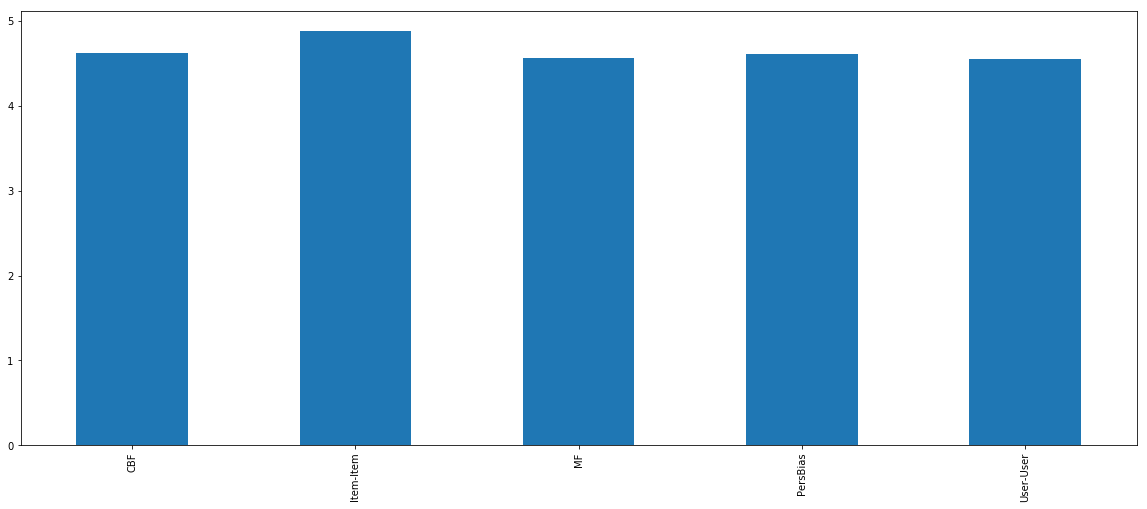

In [60]:
pd.Series(serendipity).rename('serendipity').to_frame().plot.bar(legend = None, figsize = (20, 8));

In [61]:
final_table = final_table.join(pd.Series(serendipity).rename('serendipity'))

In [62]:
final_table

,MAE_mean,MAE_std,RMSE_mean,RMSE_std,MAP@5,P@5,R@5,diversity (price),personalization,Coverage absolute,coverage,diversity (categories),serendipity
CBF,0.119093,0.095137,0.119093,0.095137,0.202042,0.104,0.044007,0.365079,0.530869,41,0.205,0.71800,4.622260
Item-Item,0.135706,0.100839,0.135706,0.100839,0.399500,0.214,0.082629,0.371214,0.895798,106,0.530,0.73525,4.875702
MF,0.121366,0.103932,0.121366,0.103932,0.115750,0.066,0.025081,0.372737,0.199030,9,0.045,0.76950,4.558488
PersBias,0.133248,0.117852,0.133248,0.117852,0.102000,0.056,0.021659,0.362438,0.000000,5,0.025,0.77500,4.607854
User-User,0.149009,0.105061,0.149009,0.105061,0.750167,0.520,0.221559,0.370699,0.948485,151,0.755,0.71225,4.552626


### Mean availability

In [63]:
imp.reload(utils)

<module 'utils' from '/home/aaleshin/Documents/stady/utils.py'>

In [64]:
availability = {}
for pg in tqdm(pages[2:]):
    data = data_raw[pg]
    availability[pg] = utils.mean_availability(data, data_raw['Items'], users)

100%|██████████| 5/5 [00:00<00:00,  5.86it/s]


In [65]:
pd.Series(availability).sort_values(ascending = False).rename('availability').to_frame()

,availability
User-User,0.695152
Item-Item,0.613373
CBF,0.585363
PersBias,0.566868
MF,0.521616


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


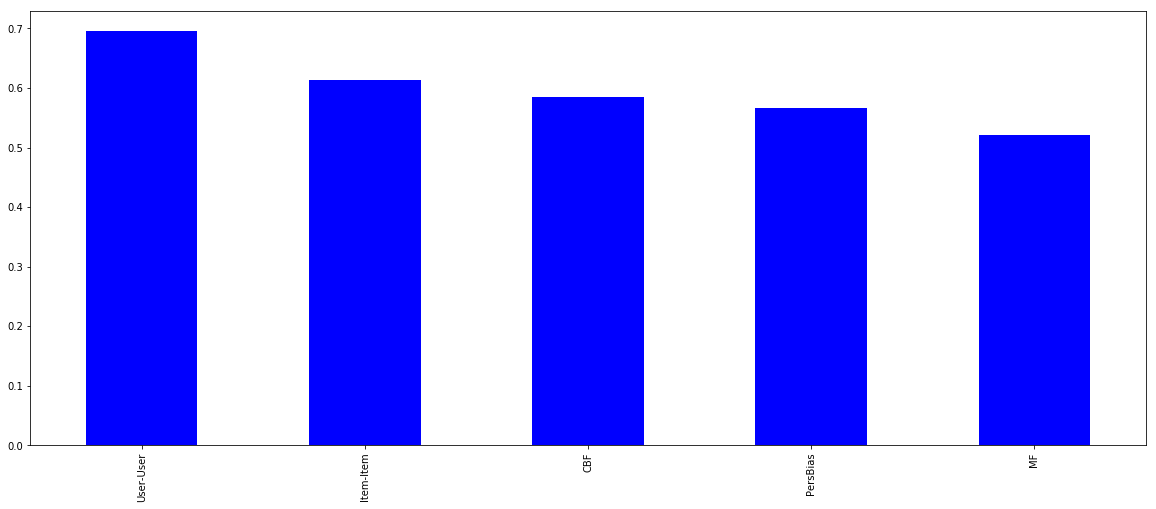

In [66]:
pd.Series(availability).sort_values(ascending = False).plot.bar(colors='b', figsize = (20, 8));

In [67]:
pd.Series(availability).sort_values()

MF           0.521616
PersBias     0.566868
CBF          0.585363
Item-Item    0.613373
User-User    0.695152
dtype: float64

In [68]:
final_table = final_table.join(pd.Series(availability).rename('availability'))

In [69]:
final_table

,MAE_mean,MAE_std,RMSE_mean,RMSE_std,MAP@5,P@5,R@5,diversity (price),personalization,Coverage absolute,coverage,diversity (categories),serendipity,availability
CBF,0.119093,0.095137,0.119093,0.095137,0.202042,0.104,0.044007,0.365079,0.530869,41,0.205,0.71800,4.622260,0.585363
Item-Item,0.135706,0.100839,0.135706,0.100839,0.399500,0.214,0.082629,0.371214,0.895798,106,0.530,0.73525,4.875702,0.613373
MF,0.121366,0.103932,0.121366,0.103932,0.115750,0.066,0.025081,0.372737,0.199030,9,0.045,0.76950,4.558488,0.521616
PersBias,0.133248,0.117852,0.133248,0.117852,0.102000,0.056,0.021659,0.362438,0.000000,5,0.025,0.77500,4.607854,0.566868
User-User,0.149009,0.105061,0.149009,0.105061,0.750167,0.520,0.221559,0.370699,0.948485,151,0.755,0.71225,4.552626,0.695152


### Result Table

In [70]:
final_table.sort_values(['Coverage absolute'], ascending = False, inplace = True)

In [71]:
final_table

,MAE_mean,MAE_std,RMSE_mean,RMSE_std,MAP@5,P@5,R@5,diversity (price),personalization,Coverage absolute,coverage,diversity (categories),serendipity,availability
User-User,0.149009,0.105061,0.149009,0.105061,0.750167,0.520,0.221559,0.370699,0.948485,151,0.755,0.71225,4.552626,0.695152
Item-Item,0.135706,0.100839,0.135706,0.100839,0.399500,0.214,0.082629,0.371214,0.895798,106,0.530,0.73525,4.875702,0.613373
CBF,0.119093,0.095137,0.119093,0.095137,0.202042,0.104,0.044007,0.365079,0.530869,41,0.205,0.71800,4.622260,0.585363
MF,0.121366,0.103932,0.121366,0.103932,0.115750,0.066,0.025081,0.372737,0.199030,9,0.045,0.76950,4.558488,0.521616
PersBias,0.133248,0.117852,0.133248,0.117852,0.102000,0.056,0.021659,0.362438,0.000000,5,0.025,0.77500,4.607854,0.566868


In [72]:
import seaborn as sns
cm = sns.light_palette("orange", as_cmap=True)

In [73]:
writer = pd.ExcelWriter('./output.xlsx')

In [74]:
final_table.style.background_gradient(cmap = cm)

,MAE_mean,MAE_std,RMSE_mean,RMSE_std,MAP@5,P@5,R@5,diversity (price),personalization,Coverage absolute,coverage,diversity (categories),serendipity,availability
User-User,0.149009,0.105061,0.149009,0.105061,0.750167,0.52,0.221559,0.370699,0.948485,151,0.755,0.71225,4.55263,0.695152
Item-Item,0.135706,0.100839,0.135706,0.100839,0.3995,0.214,0.0826293,0.371214,0.895798,106,0.53,0.73525,4.8757,0.613373
CBF,0.119093,0.0951369,0.119093,0.0951369,0.202042,0.104,0.0440069,0.365079,0.530869,41,0.205,0.718,4.62226,0.585363
MF,0.121366,0.103932,0.121366,0.103932,0.11575,0.066,0.0250812,0.372737,0.19903,9,0.045,0.7695,4.55849,0.521616
PersBias,0.133248,0.117852,0.133248,0.117852,0.102,0.056,0.0216587,0.362438,0,5,0.025,0.775,4.60785,0.566868


### Hybrids

#### Linear combination of User-User and Item-Item

In [75]:
ratio = np.arange(0, 1.1, 0.1)

In [76]:
item_item = data_raw[pages[3]]
user_user = data_raw[pages[-1]]

In [77]:
parameters = ['RMSE', 'MAE', 'MAP@5', 'P@5', 'R@5', 'div_p',
    'pers', 'cov_abs', 'cov', 'div_c', 'serend', 'availability']
values = {k: {} for k in parameters}
y = {}
for r in tqdm(ratio):
    combined_user_item = r * user_user + (1.-r) * item_item
    RMSE = utils.RMSE(combined_user_item, data_raw['Ratings'])
    MAE = utils.MAE(combined_user_item, data_raw['Ratings'])  
    values['RMSE'][r] = RMSE.mean()
    values['MAE'][r] = MAE.mean()
    values['MAP@5'][r] = pd.Series(utils.map_5(combined_user_item, users, mask)).mean()
    P_5, R_5 = utils.precision_recall(combined_user_item, data_raw['Ratings'], users, mask)     
    values['P@5'][r] = np.mean(list(P_5.values()))
    values['R@5'][r] = np.mean(list(R_5.values()))
    div_p = utils.diversity_among_price(combined_user_item, data_raw['Items'], users)
    values['div_p'][r] = pd.Series(div_p).mean()
    values['pers'][r] = utils.personalization(combined_user_item, users)
    coverage_abs = utils.coverage(combined_user_item, users)
    coverage = coverage_abs / (data_raw['Items'].index.shape[0])
    values['cov_abs'][r] = coverage_abs
    values['cov'][r] = coverage
    div_c = utils.diversity_among_category(combined_user_item, data_raw['Items'], users)
    values['div_c'][r] = pd.Series(div_c).mean()
    values['serend'][r] = utils.serendipity(combined_user_item, users, mask)
    values['availability'][r] = utils.mean_availability(combined_user_item, data_raw['Items'], users)

100%|██████████| 11/11 [01:25<00:00,  7.81s/it]


In [78]:
metrics = pd.DataFrame(values)
metrics.index = np.round(metrics.index,1)

In [79]:
metrics.style.background_gradient(cmap = cm)

,RMSE,MAE,MAP@5,P@5,R@5,div_p,pers,cov_abs,cov,div_c,serend,availability
0.0,0.57541,0.00148043,0.3895,0.21,0.0809626,0.370674,0.897212,106,0.53,0.73175,4.82314,0.612677
0.1,0.555624,0.000932532,0.432958,0.232,0.0906948,0.369927,0.901212,104,0.52,0.735,4.77206,0.62288
0.2,0.53888,0.000384638,0.49,0.272,0.108113,0.364949,0.905616,103,0.515,0.7235,4.72456,0.631969
0.3,0.525559,-0.000163256,0.535333,0.31,0.124163,0.368486,0.909091,104,0.52,0.7235,4.67702,0.644489
0.4,0.516031,-0.000711151,0.607528,0.362,0.146211,0.367386,0.91604,108,0.54,0.717,4.63556,0.65425
0.5,0.510599,-0.00125905,0.676569,0.376,0.153383,0.36785,0.914141,111,0.555,0.7145,4.60827,0.659097
0.6,0.509431,-0.00180694,0.687264,0.414,0.169333,0.367819,0.918626,117,0.585,0.71325,4.56907,0.677487
0.7,0.512518,-0.00235483,0.737264,0.444,0.183448,0.369669,0.925737,128,0.64,0.70575,4.54482,0.692617
0.8,0.519688,-0.00290273,0.763764,0.474,0.196594,0.377006,0.932404,142,0.71,0.70975,4.53531,0.695332
0.9,0.530668,-0.00345062,0.758667,0.5,0.210674,0.372474,0.941576,143,0.715,0.71125,4.53592,0.697036


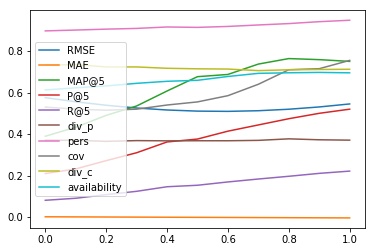

In [80]:
pd.DataFrame(values).drop(['cov_abs', 'serend'], axis = 1).plot()

### User distribution

In [81]:
nTop = 10
k = 5

In [82]:
def diversification_among_price(data_raw, pages, users, limit):        
    def calc_price_diff(series):
        sorted_values = series.sort_values(ascending=False)[:limit]
        price = data_raw['Items'].loc[sorted_values.index, 'Price']
        price = price.apply(lambda x: (x-min(price))/(max(price)-min(price)))
        dif_price = price.apply(lambda x: x - price.iloc[0])
        sorted_values = sorted_values + 5 * dif_price
        sorted_values = sorted_values.sort_values(ascending=False)[:5]
        return sorted_values.reset_index()['Item']   
    div_price = {}
    for pg in pages[2:]:
        users_data = data_raw[pg][users]
        new_rank_items = users_data.apply(calc_price_diff)
        prices = new_rank_items.applymap(lambda x: data_raw[pages[0]].loc[x, 'Price'])
        div_price[pg] = prices.apply(lambda x: np.std((x-min(x))/(max(x)-min(x)))).mean()
    return div_price

#### Diversification among price

In [83]:
imp.reload(utils)

<module 'utils' from '/home/aaleshin/Documents/stady/utils.py'>

In [84]:
values = {k: {} for k in parameters}
for r in tqdm(pages[2:]):
    data = data_raw[r]
    new_data = utils.reset_top_ratings_by_price(data, data_raw['Items'], users)
    RMSE = utils.RMSE(new_data, data_raw['Ratings'])
    MAE = utils.MAE(new_data, data_raw['Ratings'])  
    r = r+'_price'
    values['RMSE'][r] = RMSE.mean()
    values['MAE'][r] = MAE.mean()
    values['MAP@5'][r] = pd.Series(utils.map_5(new_data, users, mask)).mean()
    P_5, R_5 = utils.precision_recall(new_data, data_raw['Ratings'], users, mask)     
    values['P@5'][r] = np.mean(list(P_5.values()))
    values['R@5'][r] = np.mean(list(R_5.values()))
    div_p = utils.diversity_among_price(new_data, data_raw['Items'], users)
    values['div_p'][r] = pd.Series(div_p).mean()
    values['pers'][r] = utils.personalization(new_data, users)
    coverage_abs = utils.coverage(new_data, users)
    coverage = coverage_abs / (data_raw['Items'].index.shape[0])
    values['cov_abs'][r] = coverage_abs
    values['cov'][r] = coverage
    div_c = utils.diversity_among_category(new_data, data_raw['Items'], users)
    values['div_c'][r] = pd.Series(div_c).mean()
    values['serend'][r] = utils.serendipity(new_data, users, mask)
    values['availability'][r] = utils.mean_availability(new_data, data_raw['Items'], users)

100%|██████████| 5/5 [00:41<00:00,  8.28s/it]


In [85]:
metrics_updated_by_price = pd.DataFrame(values)
metrics_updated_by_price.sort_values(['cov_abs'], ascending = False, inplace = True)

In [86]:
metrics_updated_by_price[metrics_updated_by_price.columns[2:]].style.background_gradient(cmap = cm)

,MAP@5,P@5,R@5,div_p,pers,cov_abs,cov,div_c,serend,availability
User-User_price,0.511083,0.384,0.156223,0.373164,0.939758,160,0.8,0.73675,5.65341,0.68692
Item-Item_price,0.274736,0.176,0.0682815,0.379403,0.900646,98,0.49,0.7735,6.22911,0.606561
CBF_price,0.204861,0.1,0.0409972,0.368229,0.624848,46,0.23,0.752,6.52206,0.612983
MF_price,0.128167,0.066,0.0244844,0.360167,0.418141,15,0.075,0.788,6.58353,0.562655
PersBias_price,0.188833,0.068,0.0277949,0.348951,0,5,0.025,0.8,7.27279,0.606945


### Diversification among category

In [87]:
imp.reload(utils)

<module 'utils' from '/home/aaleshin/Documents/stady/utils.py'>

In [88]:
values = {k: {} for k in parameters}
for r in tqdm(pages[2:]):
    data = data_raw[r]
    new_data = utils.reset_top_ratings_by_category(data, data_raw['Items'], users)
    RMSE = utils.RMSE(new_data, data_raw['Ratings'])
    MAE = utils.MAE(new_data, data_raw['Ratings'])  
    r = r+'_category'
    values['RMSE'][r] = RMSE.mean()
    values['MAE'][r] = MAE.mean()
    values['MAP@5'][r] = pd.Series(utils.map_5(new_data, users, mask)).mean()
    P_5, R_5 = utils.precision_recall(new_data, data_raw['Ratings'], users, mask)     
    values['P@5'][r] = np.mean(list(P_5.values()))
    values['R@5'][r] = np.mean(list(R_5.values()))
    div_p = utils.diversity_among_price(new_data, data_raw['Items'], users)
    values['div_p'][r] = pd.Series(div_p).mean()
    values['pers'][r] = utils.personalization(new_data, users)
    coverage_abs = utils.coverage(new_data, users)
    coverage = coverage_abs / (data_raw['Items'].index.shape[0])
    values['cov_abs'][r] = coverage_abs
    values['cov'][r] = coverage
    div_c = utils.diversity_among_category(new_data, data_raw['Items'], users)
    values['div_c'][r] = pd.Series(div_c).mean()
    values['serend'][r] = utils.serendipity(new_data, users, mask)
    values['availability'][r] = utils.mean_availability(new_data, data_raw['Items'], users)

100%|██████████| 5/5 [00:54<00:00, 10.82s/it]


In [89]:
metrics_updated_category = pd.DataFrame(values)
metrics_updated_category.sort_values(['cov_abs'], ascending = False, inplace = True)

In [90]:
metrics_updated_category[metrics_updated_category.columns[2:]].style.background_gradient(cmap = cm)

,MAP@5,P@5,R@5,div_p,pers,cov_abs,cov,div_c,serend,availability
User-User_category,0.60525,0.414,0.171034,0.375843,0.950465,156,0.78,0.73275,8.41178,0.690322
Item-Item_category,0.346722,0.164,0.0624101,0.382475,0.913939,106,0.53,0.75225,8.85527,0.626048
CBF_category,0.164056,0.086,0.0351239,0.364749,0.619636,40,0.2,0.721,8.65954,0.591222
MF_category,0.138917,0.066,0.0259349,0.364879,0.228121,10,0.05,0.841,8.52181,0.545483
PersBias_category,0.147583,0.076,0.0309301,0.370688,0,5,0.025,0.775,8.48557,0.657933


### Combination of User-User and Item-Item with diversification among price and category

In [91]:
values = {k: {} for k in parameters}
r = 'UU&II_price_category'
data = 0.8 * user_user + (1.-0.8) * item_item
new_data = utils.reset_top_ratings_by_category(data, data_raw['Items'], users)
new_data = utils.reset_top_ratings_by_price(new_data, data_raw['Items'], users)
RMSE = utils.RMSE(new_data, data_raw['Ratings'])
MAE = utils.MAE(new_data, data_raw['Ratings'])  
values['RMSE'][r] = RMSE.mean()
values['MAE'][r] = MAE.mean()
values['MAP@5'][r] = pd.Series(utils.map_5(new_data, users, mask)).mean()
P_5, R_5 = utils.precision_recall(new_data, data_raw['Ratings'], users, mask)     
values['P@5'][r] = np.mean(list(P_5.values()))
values['R@5'][r] = np.mean(list(R_5.values()))
div_p = utils.diversity_among_price(new_data, data_raw['Items'], users)
values['div_p'][r] = pd.Series(div_p).mean()
values['pers'][r] = utils.personalization(new_data, users)
coverage_abs = utils.coverage(new_data, users)
coverage = coverage_abs / (data_raw['Items'].index.shape[0])
values['cov_abs'][r] = coverage_abs
values['cov'][r] = coverage
div_c = utils.diversity_among_category(new_data, data_raw['Items'], users)
values['div_c'][r] = pd.Series(div_c).mean()
values['serend'][r] = utils.serendipity(new_data, users, mask)
values['availability'][r] = utils.mean_availability(new_data, data_raw['Items'], users)

In [92]:
metrics_updated_combination = pd.DataFrame(values)

In [93]:
metrics_updated_combination[metrics_updated_combination.columns[2:]].style.background_gradient(cmap = cm)

,MAP@5,P@5,R@5,div_p,pers,cov_abs,cov,div_c,serend,availability
UU&II_price_category,0.517403,0.382,0.154192,0.376734,0.933253,136,0.68,0.72975,7.69105,0.693117


In [94]:
metrics_updated_by_price[metrics_updated_by_price.columns[2:]].append(
    metrics_updated_category[metrics_updated_category.columns[2:]]
).append(
    metrics_updated_combination[metrics_updated_combination.columns[2:]]
).sort_values(['cov_abs'], ascending = False).style.background_gradient(cmap = cm)

,MAP@5,P@5,R@5,div_p,pers,cov_abs,cov,div_c,serend,availability
User-User_price,0.511083,0.384,0.156223,0.373164,0.939758,160,0.8,0.73675,5.65341,0.68692
User-User_category,0.60525,0.414,0.171034,0.375843,0.950465,156,0.78,0.73275,8.41178,0.690322
UU&II_price_category,0.517403,0.382,0.154192,0.376734,0.933253,136,0.68,0.72975,7.69105,0.693117
Item-Item_category,0.346722,0.164,0.0624101,0.382475,0.913939,106,0.53,0.75225,8.85527,0.626048
Item-Item_price,0.274736,0.176,0.0682815,0.379403,0.900646,98,0.49,0.7735,6.22911,0.606561
CBF_price,0.204861,0.1,0.0409972,0.368229,0.624848,46,0.23,0.752,6.52206,0.612983
CBF_category,0.164056,0.086,0.0351239,0.364749,0.619636,40,0.2,0.721,8.65954,0.591222
MF_price,0.128167,0.066,0.0244844,0.360167,0.418141,15,0.075,0.788,6.58353,0.562655
MF_category,0.138917,0.066,0.0259349,0.364879,0.228121,10,0.05,0.841,8.52181,0.545483
PersBias_price,0.188833,0.068,0.0277949,0.348951,0,5,0.025,0.8,7.27279,0.606945


### Examples of recomendations

In [95]:
data_to_show = utils.reset_top_ratings_by_category(data, data_raw['Items'], users)

In [96]:
user = users[3]
print('user id: {}'.format(user))
data_raw['Items'].loc[data_to_show[user].sort_values(ascending = False).iloc[:5].index]

user id: 1862


,Availability,ASIN,Price,Brand,Title,LeafCat,FullCat
Item,,,,,,,
1032,0.644513,B001DPSUUI,23.00,Fellowes,"Fellowes Hot Laminating Pouches, Letter, 5 mil...",Laminating Supplies,Office Products/Office Electronics/Presentatio...
670,0.981560,B000MFHX3U,7.67,3M,"3M Whiteboard Eraser for Whiteboards, 2-Pack",Dry Erase Boards,Office Products/Office & School Supplies/Prese...
1217,0.991766,B0027CTFBO,21.79,Fellowes,Bankers Box SmoothMove Moving and Storage Boxe...,Box Mailers,Office Products/Office & School Supplies/Envel...
1297,0.945595,B002K9M7MS,NaN,NaN,"3M Permanent Adhesive Shipping Labels, 2 x 4 I...",Shipping Labels,Office Products/Office & School Supplies/Label...
1317,0.901367,B002M7VZXA,15.16,NaN,"Avery NoteTabs, 2 x 1.5 Inches, Neon Blue and ...",Removable Labels,Office Products/Office & School Supplies/Label...
